# Visualization of the Colombian Intraday Market

In [1]:
import pandas as pd
import numpy as np

In [2]:
intra = pd.read_csv('data_truncada_1m.csv', parse_dates=[2], sep=',',na_values='NA')

In [ ]:
intra.tail()

In [3]:
intra=intra.drop(['Unnamed: 0','dia','dia.1','Quoted_spread'],axis=1)

In [4]:
intra.columns=['nombre','date_time','tipo','precio','volumen','bid','ask','mid_price','bid_depth','ask_depth','depth','quote_spread']

In [5]:
intra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649501 entries, 0 to 649500
Data columns (total 12 columns):
nombre          649501 non-null object
date_time       649501 non-null datetime64[ns]
tipo            649501 non-null object
precio          649501 non-null int64
volumen         649501 non-null float64
bid             619327 non-null float64
ask             619327 non-null float64
mid_price       619327 non-null float64
bid_depth       619327 non-null float64
ask_depth       619327 non-null float64
depth           619327 non-null float64
quote_spread    619327 non-null float64
dtypes: datetime64[ns](1), float64(8), int64(1), object(2)
memory usage: 59.5+ MB


## 1. Volumen para una accion, Ejemplo Ecopetrol Marzo a Agosto 2017

In [6]:
ass=intra[(intra.nombre=='ECOPETL CB Equity') & (intra.tipo=="TRADE")]
ass.index=ass.date_time
ass=ass.drop('date_time',axis=1)

In [ ]:
ass.info()

In [7]:
#agregate every 15 minutes
vol15min=ass.volumen.resample("15T").sum().fillna(value=0)
len(vol15min)

17402

In [8]:
#select only trading time for each day
vol15min=vol15min[(vol15min.index.hour>=9) & (vol15min.index.hour<16)]
len(vol15min)

5094

In [9]:
vol15min=vol15min.reset_index()

In [10]:
vol15min['date']=pd.to_datetime(vol15min.date_time.dt.date)
vol15min['time']=vol15min.date_time.dt.time
vol15min.head()

,date_time,volumen,date,time
0,2017-03-03 09:30:00,131252.0,2017-03-03,09:30:00
1,2017-03-03 09:45:00,464515.0,2017-03-03,09:45:00
2,2017-03-03 10:00:00,194165.0,2017-03-03,10:00:00
3,2017-03-03 10:15:00,569081.0,2017-03-03,10:15:00
4,2017-03-03 10:30:00,307007.0,2017-03-03,10:30:00


In [11]:
vol15min.tail()

,date_time,volumen,date,time
5089,2017-08-31 14:45:00,5908.0,2017-08-31,14:45:00
5090,2017-08-31 15:00:00,1043167.0,2017-08-31,15:00:00
5091,2017-08-31 15:15:00,603714.0,2017-08-31,15:15:00
5092,2017-08-31 15:30:00,1309145.0,2017-08-31,15:30:00
5093,2017-08-31 15:45:00,560582.0,2017-08-31,15:45:00


In [12]:
#Create Business days Colombia
weekmask='Mon Tue Wed Thu Fri'
holydays=[pd.datetime(2017, 1, 9),pd.datetime(2017, 3, 20),pd.datetime(2017, 4, 13),
         pd.datetime(2017, 4, 14),pd.datetime(2017, 5, 1),pd.datetime(2017, 5, 29),
         pd.datetime(2017, 6, 19),pd.datetime(2017, 6, 26),pd.datetime(2017, 7, 3),
         pd.datetime(2017, 7, 20),pd.datetime(2017, 8, 7),pd.datetime(2017, 8, 21),
         pd.datetime(2017, 10, 16),pd.datetime(2017, 11, 6),pd.datetime(2017, 11, 13),
         pd.datetime(2017, 12, 8),pd.datetime(2017, 12, 25)]
BdaysCol2017=pd.bdate_range(start=pd.datetime(2017, 1, 1),end=pd.datetime(2017, 12, 31),
                           weekmask=weekmask,holidays=holydays)

In [13]:
#select only business days colombia
vol15minF=vol15min[vol15min.date.isin(BdaysCol2017)]

In [14]:
len(vol15minF)

3638

In [15]:
vol15minF.head()

,date_time,volumen,date,time
0,2017-03-03 09:30:00,131252.0,2017-03-03,09:30:00
1,2017-03-03 09:45:00,464515.0,2017-03-03,09:45:00
2,2017-03-03 10:00:00,194165.0,2017-03-03,10:00:00
3,2017-03-03 10:15:00,569081.0,2017-03-03,10:15:00
4,2017-03-03 10:30:00,307007.0,2017-03-03,10:30:00


In [16]:
vol15minF=vol15minF.drop(['date','time'],axis=1)

In [17]:
vol15minF.head()

,date_time,volumen
0,2017-03-03 09:30:00,131252.0
1,2017-03-03 09:45:00,464515.0
2,2017-03-03 10:00:00,194165.0
3,2017-03-03 10:15:00,569081.0
4,2017-03-03 10:30:00,307007.0


In [18]:
#pivot
vol15minF=vol15minF.pivot_table(index=[vol15minF.date_time.dt.date, vol15minF.date_time.dt.time]).unstack(1)

In [20]:
#log (volume +1)
vol15minP=np.log(vol15minF.iloc[:,2:]+1)
#vol15minP.info()

In [21]:
#Eliminate days with all 0, why do these exist Bloomberg error, preguntar Catalina
vol15minP=vol15minP[vol15minP.sum(1)!=0]
vol15minP.head()

volumen                                                         \
date_time    09:30:00   09:45:00   10:00:00   10:15:00   10:30:00   10:45:00   
date_time                                                                      
2017-03-03  11.784882  13.048751  12.176469  13.251780  12.634629  13.581282   
2017-03-06  13.480703  13.509140  11.673530  12.475775   8.272826  13.552984   
2017-03-07  14.684590  11.910083  12.314003  12.741489  11.191356  12.186084   
2017-03-08  12.639111  13.455557  12.477221  12.230512  12.136192  11.582843   
2017-03-09  12.542927  13.366087  12.737615   9.606428  13.206706  13.366780   

                                                          ...                 \
date_time    11:00:00   11:15:00   11:30:00   11:45:00    ...       13:30:00   
date_time                                                 ...                  
2017-03-03  12.278630   9.527921   8.631593   6.908755    ...       8.163656   
2017-03-06  14.383750  10.544920  10.576585  12.955144    ...       8.006701   
2017-03-07   8.160804  10.994907  12.030921  14.048082    ...       8.612685   
2017-03-08  14.511237  13.827900  12.253490  11.853290    ...      12.757054   
2017-03-09   8.517393  10.948330  13.516138  12.054674    ...      10.446190   

                                                                              \
date_time    13:45:00   14:00:00   14:15:00   14:30:00   14:45:00   15:00:00   
date_time                                                                      
2017-03-03   7.265430   8.551208   0.000000   8.701513  10.878066  11.566210   
2017-03-06   8.417373   7.313887   8.240385   9.018817   8.824825  11.888048   
2017-03-07   8.533263  11.431184  11.925042   8.079928   7.673688  11.667662   
2017-03-08  13.000243  13.851323   7.406103  13.751386   9.927643   0.000000   
2017-03-09   6.216606   7.313887  11.273957  10.282027  13.170647  12.138377   

                                             
date_time    15:15:00   15:30:00   15:45:00  
date_time                                    
2017-03-03  11.866999   9.439943  11.317373  
2017-03-06  11.014753  10.040071  12.862149  
2017-03-07  11.514554  10.798207  10.275086  
2017-03-08   9.210440  12.871954  12.424606  
2017-03-09  12.698758  13.644403  13.382073  

[5 rows x 26 columns]

In [22]:
volmedian=vol15minP.median(0)
volq25=vol15minP.quantile(q=0.25,axis=0)
volq75=vol15minP.quantile(q=0.75,axis=0)

In [ ]:
#vol15minP.to_excel('test.xlsx')

## 2. Densidad del volumen Intradia en cada intervalo de tiempo: 15 minutos

In [23]:
#estimate Kernel density for each timestamp column using historical data
Gmax=np.rint(vol15minP.values.max())
Gmin=np.rint(vol15minP.values.min())
print(Gmin,Gmax)

0.0 18.0


In [24]:
#interval to visualize density
lvols=np.arange(start=Gmin,stop=Gmax+1,step=1)
#lvols

In [25]:
from scipy import stats

In [26]:
XX=vol15minP.as_matrix()

In [27]:
densM=[]
for k in range(XX.shape[1]):
    kde = stats.gaussian_kde((XX[:,k]))
    densM.append(kde(lvols))

In [28]:
vol15minD=pd.DataFrame(np.reshape(densM,(26,19)).transpose(), index=lvols,columns=vol15minP.columns)
#vol15minD.head()

## 2. Visualizacion

In [29]:
rvol15minD = vol15minD.iloc[::-1]
rvol15minD.index=np.flipud(lvols)
#rvol15minD.head()

In [30]:
timelab=('9:15','9:30','9:45','10:00','10:15','10:30','10:45','11:00',
        '11:15','11:30','11:45','12:00','12:15','12:30','12:45','13:00','13:15',
        '13:30','13:45','14:00','14:15','14:30','14:45','15:00','15:15','15:30','15:45')

In [31]:
import matplotlib.pyplot as plt

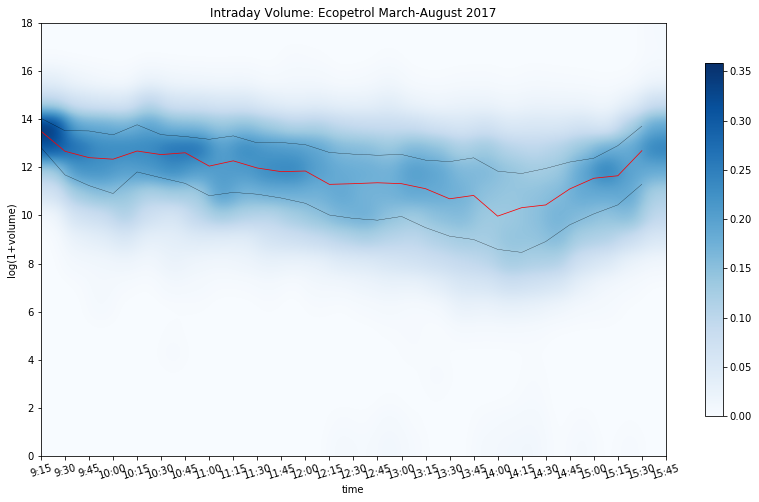

In [33]:
plt.figure(figsize=(14,10))
plt.imshow(rvol15minD.values,cmap=plt.cm.Blues,interpolation='gaussian',
          extent=[0, 26, 0, 18], vmax=rvol15minD.values.max(), vmin=rvol15minD.values.min())
plt.colorbar(shrink=0.65)
plt.plot(volmedian.values,color='red',linewidth=0.75)
plt.plot(volq25.values,color='black',linewidth=0.25)
plt.plot(volq75.values,color='black',linewidth=0.25)
plt.grid(b='off')
plt.ylabel('log(1+volume)')
plt.xlabel('time')
plt.title('Intraday Volume: Ecopetrol March-August 2017')
plt.xticks(np.arange(27),timelab, rotation=17)
plt.show()